In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
sns.set(rc={'figure.figsize':(20,8),
           'legend.markerscale': 5})
sns.set_style('whitegrid')

In [178]:
season_colors = {'Summer': sns.color_palette()[1], 'Winter': sns.color_palette()[0]}
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'darkorange'}

In [99]:
START_YEAR = 1945
END_YEAR = 2018

In [124]:
df_athletes = pd.read_csv('../data/athletes.csv')
df_athletes = df_athletes[(df_athletes['Year'] > START_YEAR) & (df_athletes['Year'] <= END_YEAR)]
df_athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [125]:
df_hosts = pd.read_csv('../data/hosts.csv')
df_hosts = df_hosts[(df_hosts['Year'] > START_YEAR) & (df_hosts['Year'] <= END_YEAR)]
df_hosts.head(5)

,City,Country,Continent,Year,Opening Ceremony,Closing Ceremony,Season,Games
19,St. Moritz,Switzerland,Europe,1948,January 30,February 8,Winter,1948 Winter
20,London,United Kingdom,Europe,1948,July 29,August 14,Summer,1948 Summer
21,Oslo,Norway,Europe,1952,February 14,February 25,Winter,1952 Winter
22,Helsinki,Finland,Europe,1952,July 19,August 3,Summer,1952 Summer
23,Cortina d'Ampezzo,Italy,Europe,1956,January 26,February 5,Winter,1956 Winter


In [192]:
df_nocs = pd.read_csv('../data/nocs.csv')
df_nocs.head(5)

,NOC,Region,Notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [173]:
def medals_by_games(df_athletes: pd.DataFrame) -> pd.Series:
    stats = {'Athlets': df_athletes.shape[0],
             'Medals': df_athletes.dropna(subset=['Medal']).shape[0],
             'Gold': df_athletes[df_athletes['Medal'] == 'Gold'].shape[0],
             'Silver': df_athletes[df_athletes['Medal'] == 'Silver'].shape[0],
             'Bronze': df_athletes[df_athletes['Medal'] == 'Bronze'].shape[0],
            }
    return pd.Series(stats)

In [179]:
df_medals_by_games = df_athletes.groupby(['Year', 'Season']).apply(medals_by_games).reset_index()
df_medals_by_games.head(5)

,Year,Season,Athlets,Medals,Gold,Silver,Bronze
0,1948,Summer,6405,852,289,284,279
1,1948,Winter,1075,135,41,48,46
2,1952,Summer,8270,897,306,291,300
3,1952,Winter,1088,136,45,44,47
4,1956,Summer,5127,893,302,293,298


<AxesSubplot:xlabel='Year', ylabel='Athlets'>

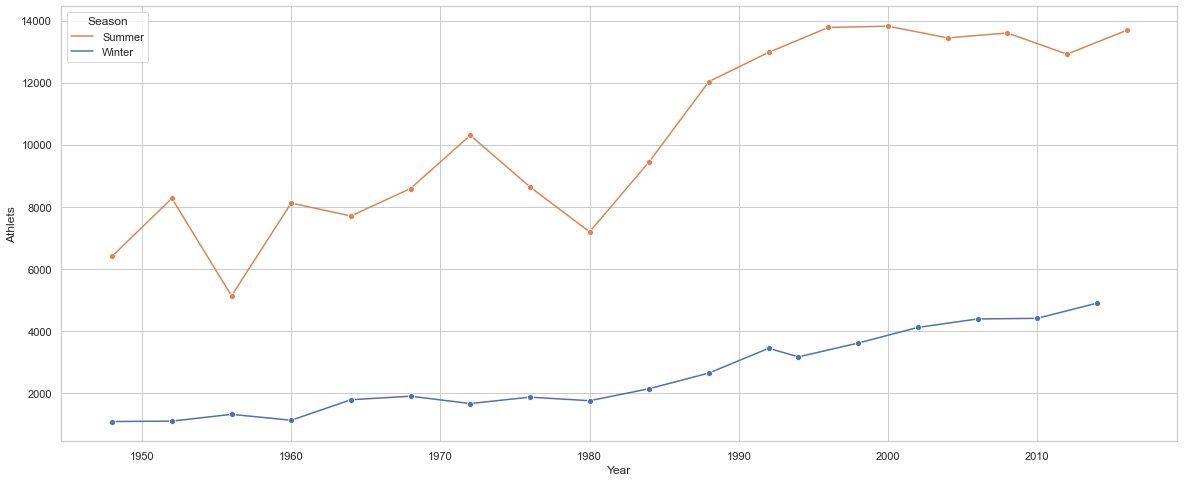

In [187]:
sns.lineplot(data=df_medals_by_games, x='Year', y='Athlets', hue='Season', marker='o', palette=season_colors)

<AxesSubplot:xlabel='Year', ylabel='Medals'>

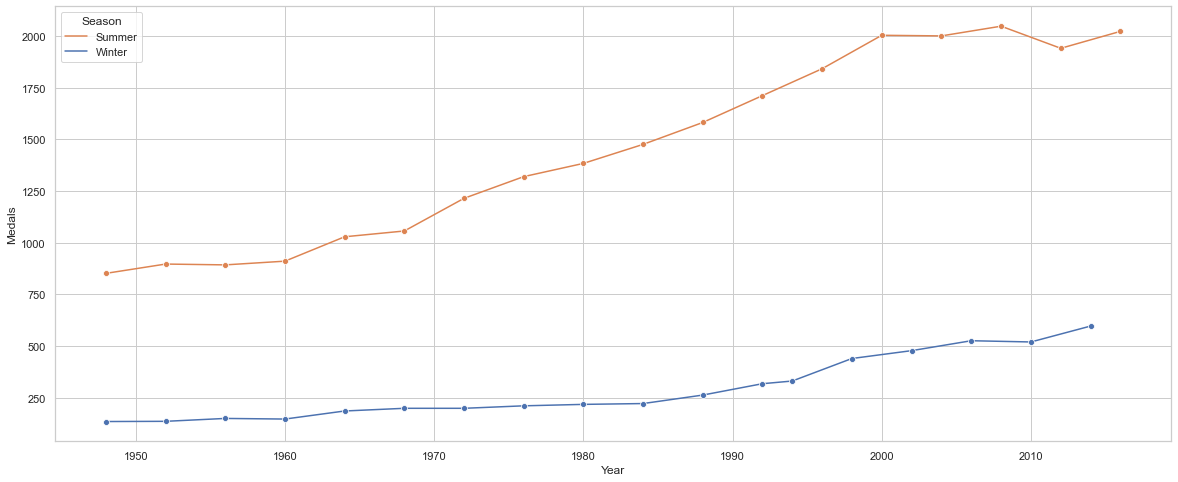

In [188]:
sns.lineplot(data=df_medals_by_games, x='Year', y='Medals', hue='Season', marker='o', palette=season_colors)

In [222]:
df_medals_by_nocs = df_athletes.groupby(['Year', 'Season', 'NOC']).apply(medals_by_games).reset_index()
df_medals_by_nocs.head(5)

,Year,Season,NOC,Athlets,Medals,Gold,Silver,Bronze
0,1948,Summer,AFG,25,0,0,0,0
1,1948,Summer,ARG,295,11,3,7,1
2,1948,Summer,AUS,103,16,2,9,5
3,1948,Summer,AUT,239,8,2,2,4
4,1948,Summer,BEL,182,15,5,2,8


In [223]:
def medals_ratio(df_athlets: pd.DataFrame) -> pd.DataFrame:
    df_athlets['Medals'] = df_athlets['Medals'] / df_athlets['Medals'].sum()
    df_athlets['Gold'] = df_athlets['Gold'] / df_athlets['Gold'].sum()
    df_athlets['Silver'] = df_athlets['Silver'] / df_athlets['Silver'].sum()
    df_athlets['Bronze'] = df_athlets['Bronze'] / df_athlets['Bronze'].sum()
    return df_athlets

df_medals_ratio_by_nocs = df_medals_by_nocs.groupby(['Year', 'Season']).apply(medals_ratio)
df_medals_ratio_by_nocs.head(5)

,Year,Season,NOC,Athlets,Medals,Gold,Silver,Bronze
0,1948,Summer,AFG,25,0.000000,0.000000,0.000000,0.000000
1,1948,Summer,ARG,295,0.012911,0.010381,0.024648,0.003584
2,1948,Summer,AUS,103,0.018779,0.006920,0.031690,0.017921
3,1948,Summer,AUT,239,0.009390,0.006920,0.007042,0.014337
4,1948,Summer,BEL,182,0.017606,0.017301,0.007042,0.028674


In [220]:
df_hosts_nocs = pd.merge(df_nocs[['NOC', 'Region']], 
                         df_hosts[['Country', 'Year', 'Season', 'Games']], 
                         left_on='Region', right_on='Country')
df_hosts_nocs.head(10)

,NOC,Region,Country,Year,Season,Games
0,ANZ,Australia,Australia,1956,Summer,1956 Summer
1,ANZ,Australia,Australia,2000,Summer,2000 Summer
2,AUS,Australia,Australia,1956,Summer,1956 Summer
3,AUS,Australia,Australia,2000,Summer,2000 Summer
4,AUT,Austria,Austria,1964,Winter,1964 Winter
5,AUT,Austria,Austria,1976,Winter,1976 Winter
6,BRA,Brazil,Brazil,2016,Summer,2016 Summer
7,CAN,Canada,Canada,1976,Summer,1976 Summer
8,CAN,Canada,Canada,1988,Winter,1988 Winter
9,CAN,Canada,Canada,2010,Winter,2010 Winter


<AxesSubplot:xlabel='Year', ylabel='Medals'>

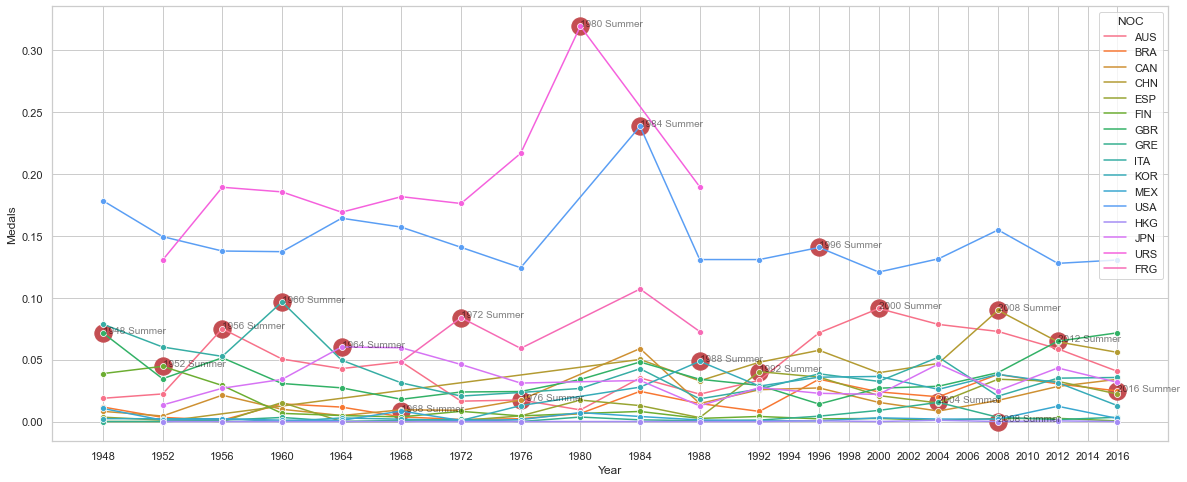

In [253]:
df_hosts_nocs_to_show = df_hosts_nocs[df_hosts_nocs['Season'] == 'Summer']
df_medals_by_nocs_to_show = df_medals_ratio_by_nocs[(df_medals_ratio_by_nocs['Season'] == 'Summer') & 
                                                    (df_medals_ratio_by_nocs['NOC'].isin(df_hosts_nocs_to_show['NOC'].unique()))]

g = sns.lineplot(data=df_medals_by_nocs_to_show, x='Year', y='Medals', hue='NOC', marker='o')
g.set_xticks(df_athletes_by_year['Year'].unique())

for _, host_noc in df_hosts_nocs_to_show.iterrows():
    for _, games in df_medals_by_nocs_to_show[(df_medals_by_nocs_to_show['Year'] == host_noc['Year']) &
                                              (df_medals_by_nocs_to_show['NOC'] == host_noc['NOC'])].iterrows():        
        plt.text(games['Year'], games['Medals'], host_noc['Games'], fontdict=dict(color='black', alpha=0.5, size=10))
        plt.scatter(games['Year'], games['Medals'], s=300, c='r')
g

In [ ]:
# df_gene_by_year = df_athletes.dropna(subset=['Medal']).groupby('Games').size().reset_index(name='Medals')

# df_stats = pd.merge(df_hosts[['City', 'Country', 'Year', 'Season', 'Games']], df_medals_by_year, on='Games')
# df_stats.head(5)

In [26]:
df_athletes_by_year = df_athletes.groupby(['Year', 'Season']).count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='ID'>

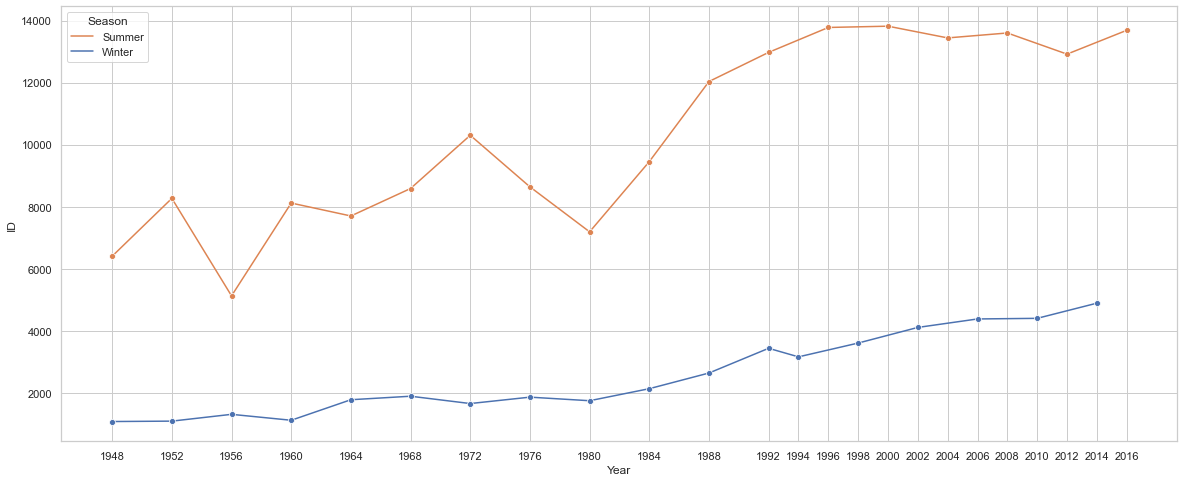

In [27]:
g = sns.lineplot(data=df_athletes_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [28]:
df_hosts[df_hosts['Year'].isin([1956, 1972, 1980, 1992, 1994, 2016])]

,City,Country,Continent,Summer,Winter,Year,Opening Ceremony,Closing Ceremony
23,Cortina d'Ampezzo,Italy,Europe,-,VII,1956,January 26,February 5
24,Melbourne,Australia,Oceania,XVI,-,1956,November 22,December 8
31,Sapporo,Japan,Asia,-,XI,1972,February 3,February 13
32,Munich,West Germany,Europe,XX,-,1972,August 26,September 11
35,Lake Placid,United States,North America,-,XIII,1980,February 12,February 24
36,Moscow,Soviet Union,Europe,XXII,-,1980,July 19,August 3
41,Albertville,France,Europe,-,XVI,1992,February 8,February 23
42,Barcelona,Spain,Europe,XXV,-,1992,July 25,August 9
43,Lillehammer,Norway,Europe,-,XVII,1994,February 12,February 27
54,Rio de Janeiro,Brazil,South America,XXXI,-,2016,August 5,August 21


<AxesSubplot:xlabel='Year', ylabel='ID'>

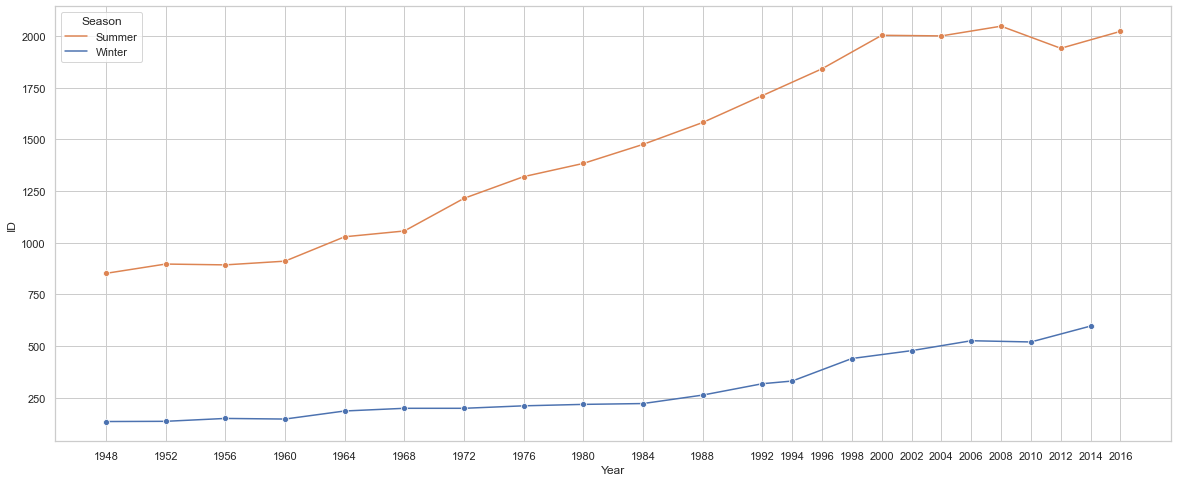

In [29]:
df_medals_by_year = df_athletes.dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()
g = sns.lineplot(data=df_medals_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [30]:
df_hosts['Country'].value_counts()

United States     5
Canada            3
Japan             3
Italy             3
Austria           2
Norway            2
Australia         2
France            2
United Kingdom    2
South Korea       1
Finland           1
Switzerland       1
Spain             1
Mexico            1
Greece            1
Yugoslavia        1
Brazil            1
West Germany      1
Soviet Union      1
China             1
Russia            1
Name: Country, dtype: int64

    Year      Country        City Summer Winter
19  1948  Switzerland  St. Moritz      -      V
['SUI']


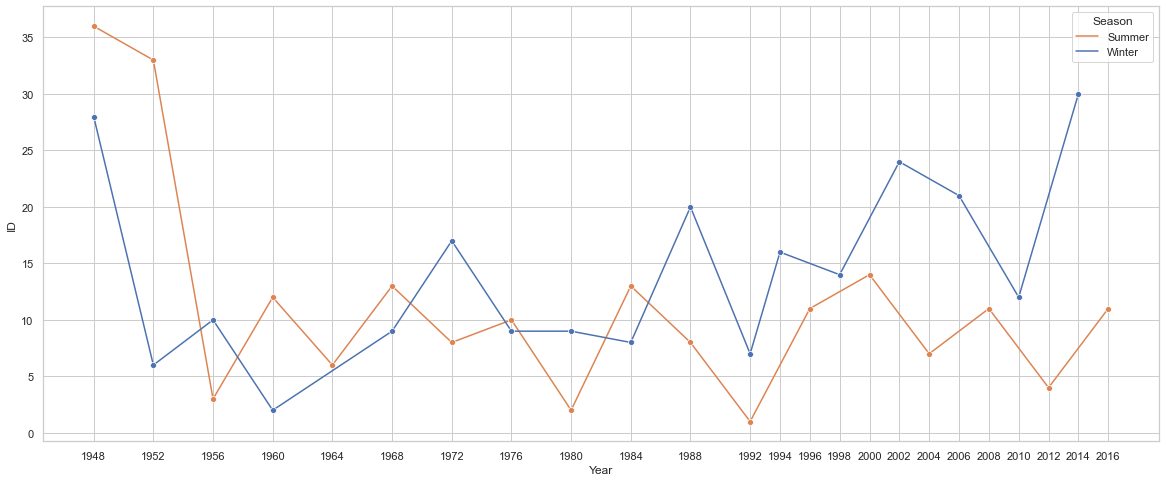

    Year         Country    City Summer Winter
20  1948  United Kingdom  London    XIV      -
52  2012  United Kingdom  London    XXX      -
['GBR']


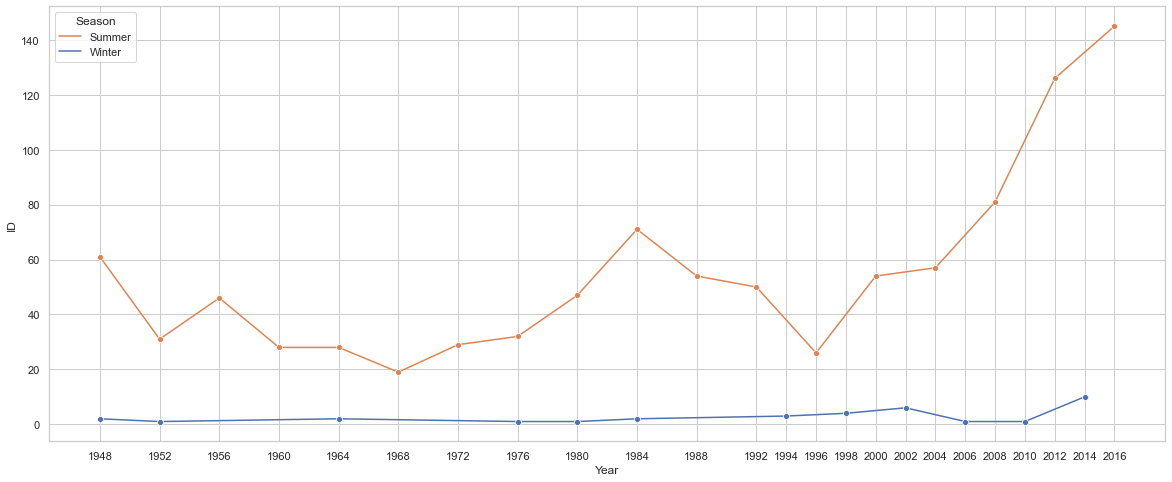

    Year Country         City Summer Winter
21  1952  Norway         Oslo      -     VI
43  1994  Norway  Lillehammer      -   XVII
['NOR']


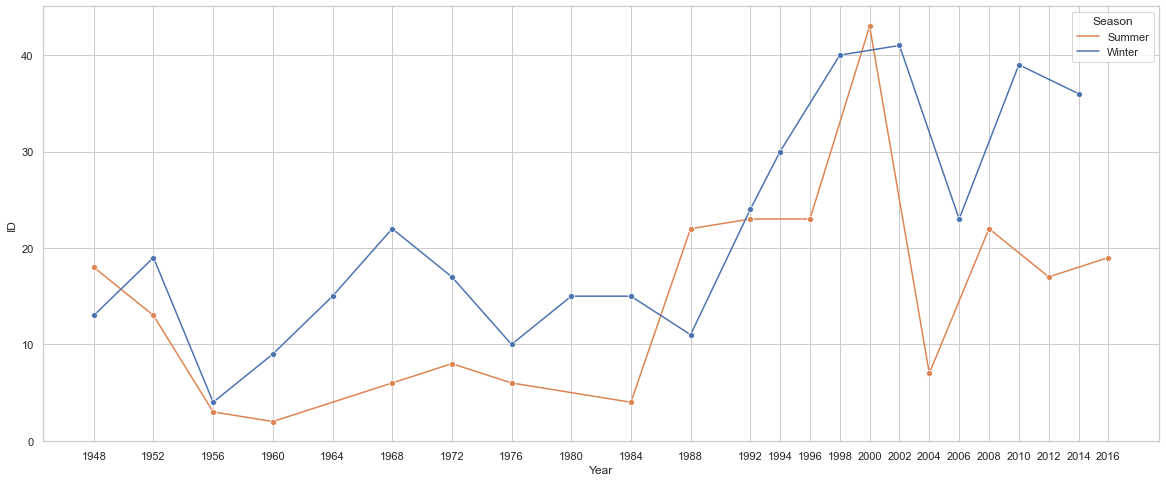

    Year  Country      City Summer Winter
22  1952  Finland  Helsinki     XV      -
['FIN']


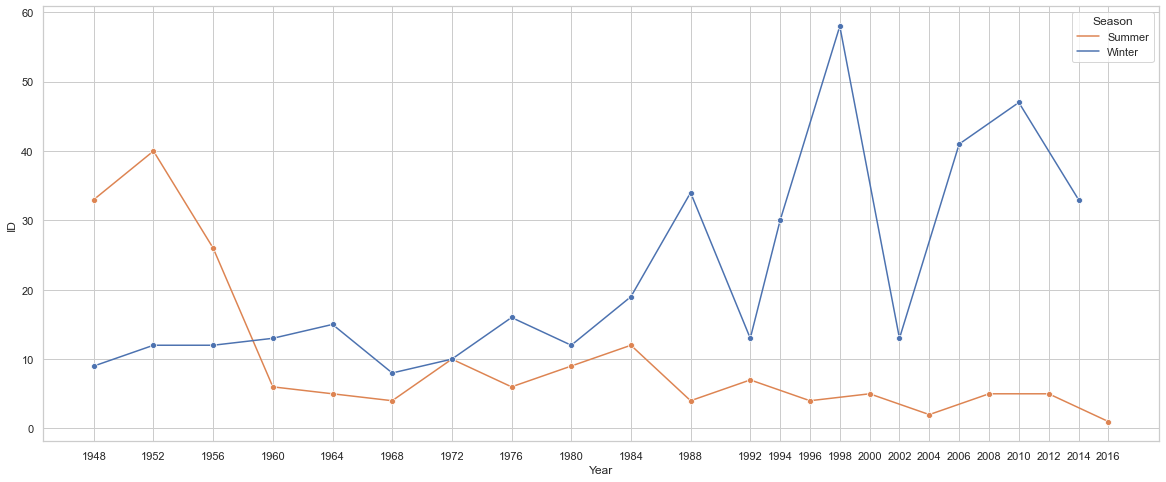

    Year Country               City Summer Winter
23  1956   Italy  Cortina d'Ampezzo      -    VII
26  1960   Italy               Rome   XVII      -
49  2006   Italy              Turin      -     XX
['ITA']


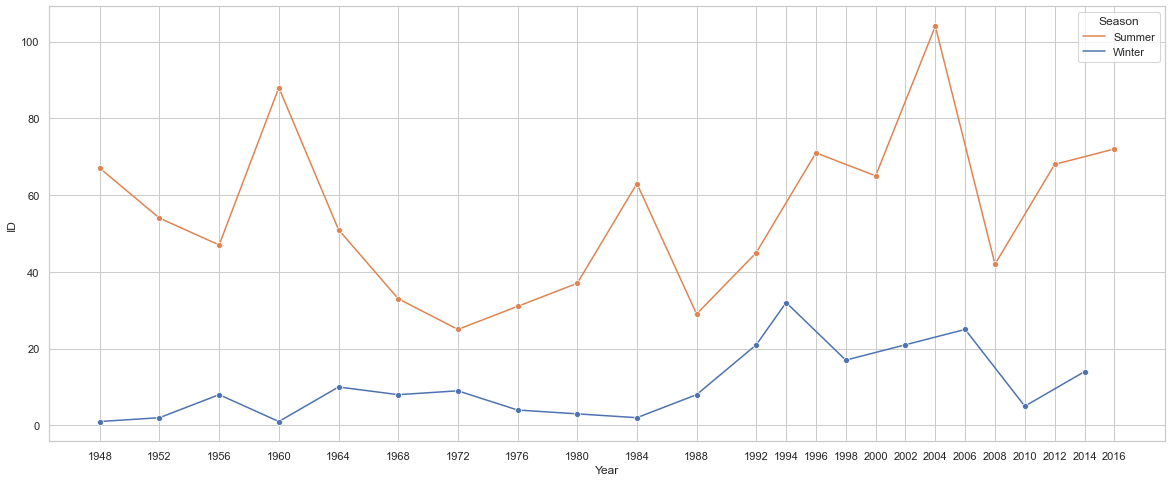

    Year    Country       City Summer Winter
24  1956  Australia  Melbourne    XVI      -
46  2000  Australia     Sydney  XXVII      -
['ANZ' 'AUS']


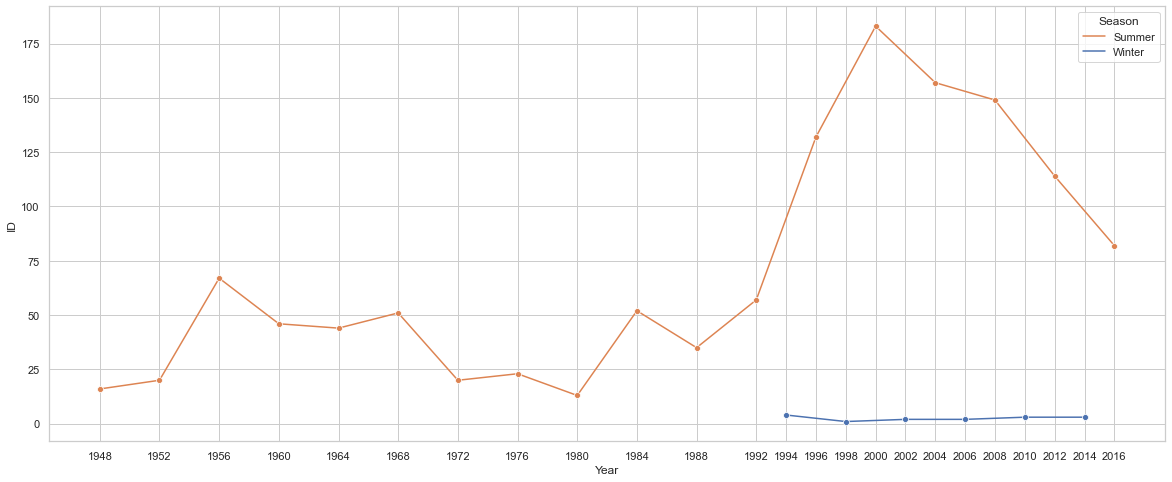

    Year        Country            City Summer Winter
25  1960  United States    Squaw Valley      -   VIII
35  1980  United States     Lake Placid      -   XIII
38  1984  United States     Los Angeles  XXIII      -
44  1996  United States         Atlanta   XXVI      -
47  2002  United States  Salt Lake City      -    XIX
['USA']


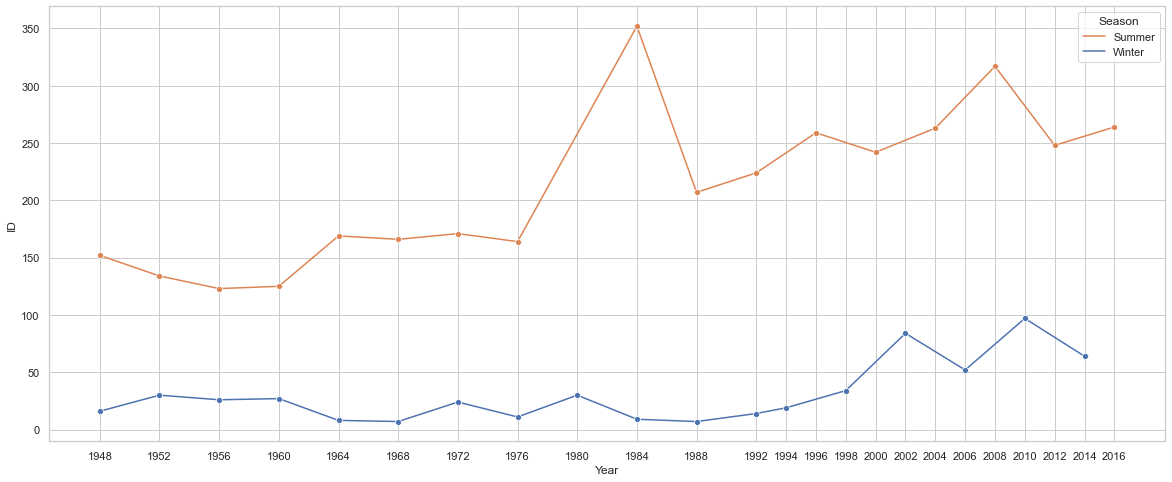

    Year  Country       City Summer Winter
27  1964  Austria  Innsbruck      -     IX
33  1976  Austria  Innsbruck      -    XII
['AUT']


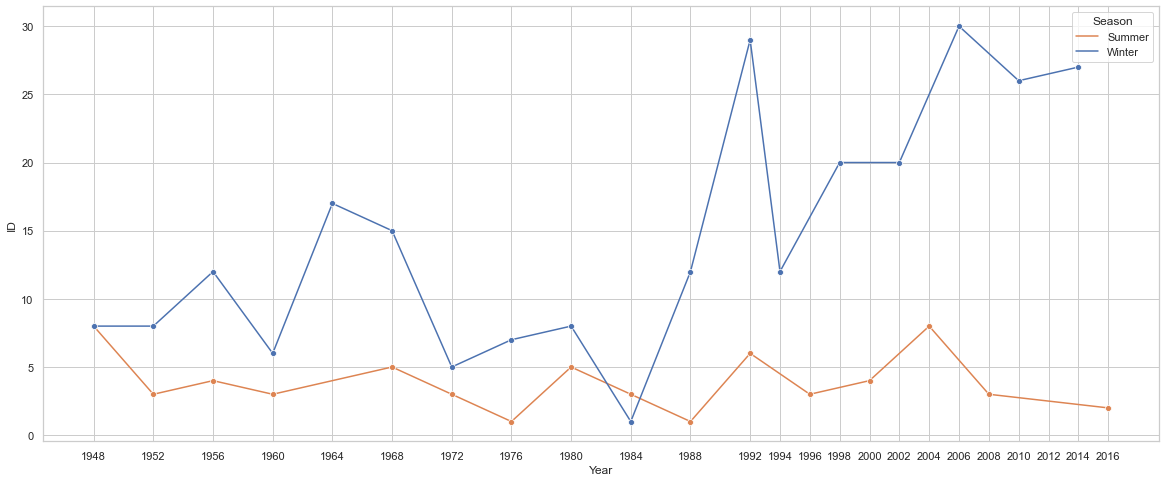

    Year Country     City Summer Winter
28  1964   Japan    Tokyo  XVIII      -
31  1972   Japan  Sapporo      -     XI
45  1998   Japan   Nagano      -  XVIII
['JPN']


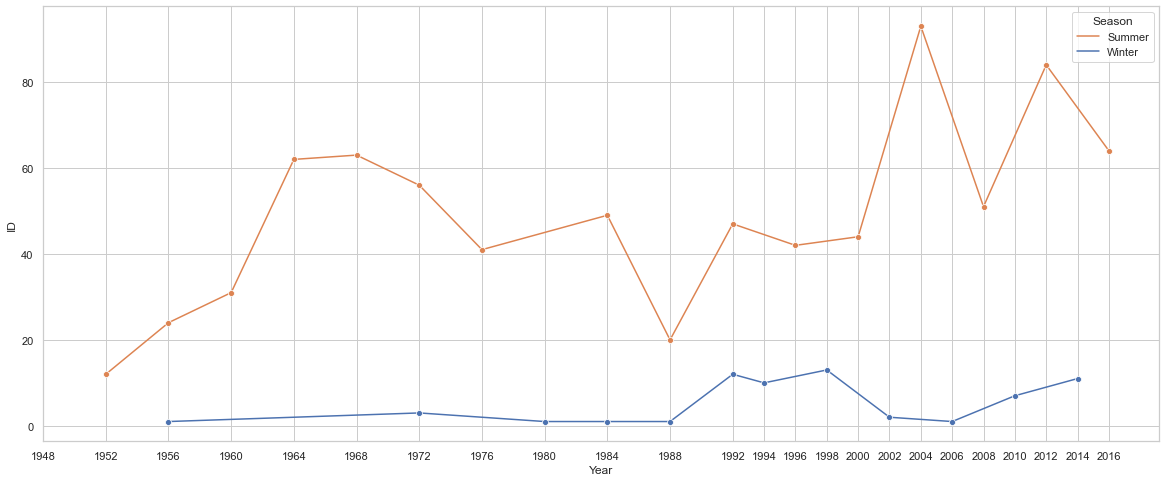

    Year Country         City Summer Winter
29  1968  France     Grenoble      -      X
41  1992  France  Albertville      -    XVI
['FRA']


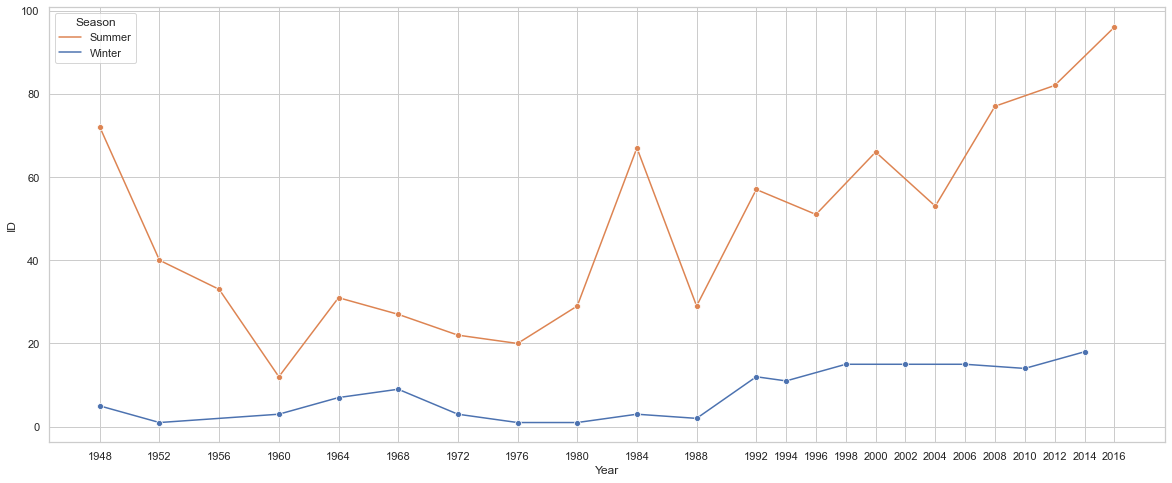

    Year Country         City Summer Winter
30  1968  Mexico  Mexico City    XIX      -
['MEX']


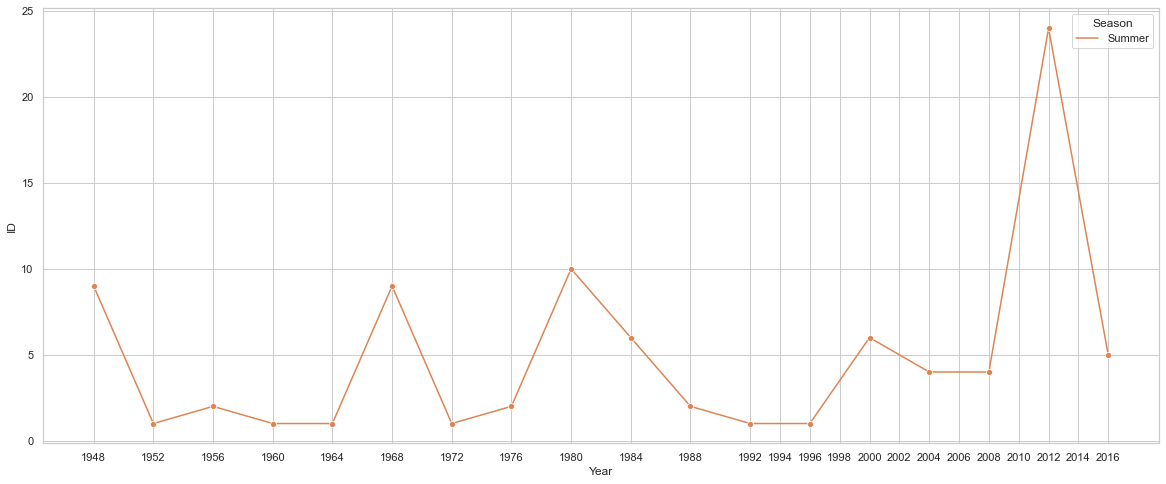

    Year       Country    City Summer Winter
32  1972  West Germany  Munich     XX      -
['FRG']


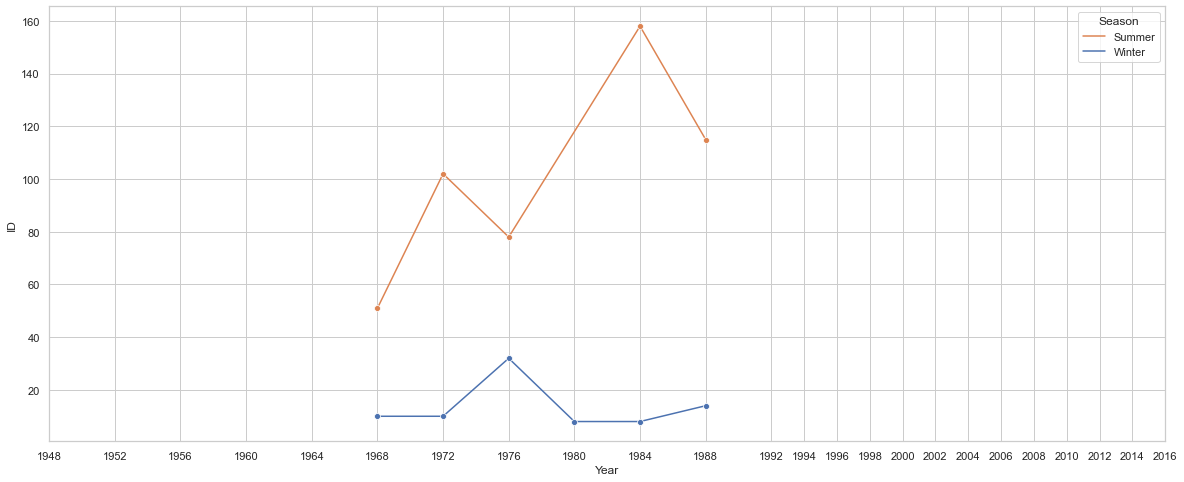

    Year Country       City Summer Winter
34  1976  Canada   Montreal    XXI      -
39  1988  Canada    Calgary      -     XV
51  2010  Canada  Vancouver      -    XXI
['CAN' 'NFL']


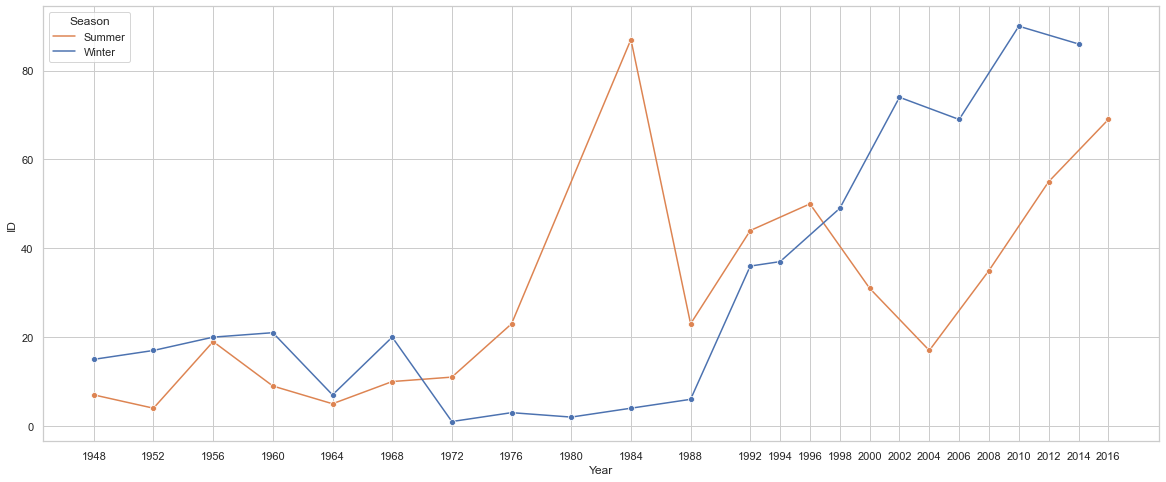

    Year       Country    City Summer Winter
36  1980  Soviet Union  Moscow   XXII      -
['URS']


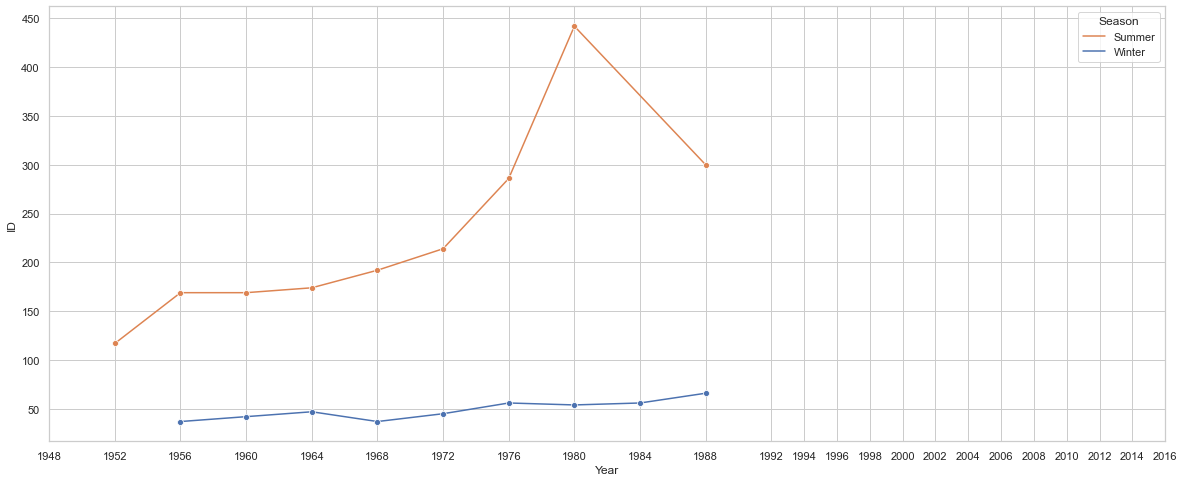

    Year     Country      City Summer Winter
37  1984  Yugoslavia  Sarajevo      -    XIV
['YUG']


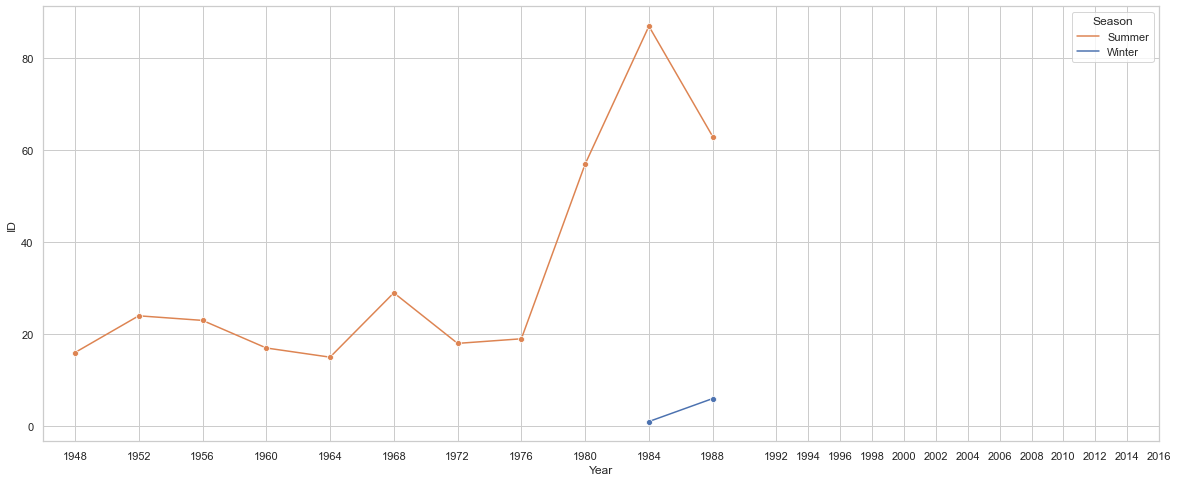

    Year      Country   City Summer Winter
40  1988  South Korea  Seoul   XXIV      -
['KOR']


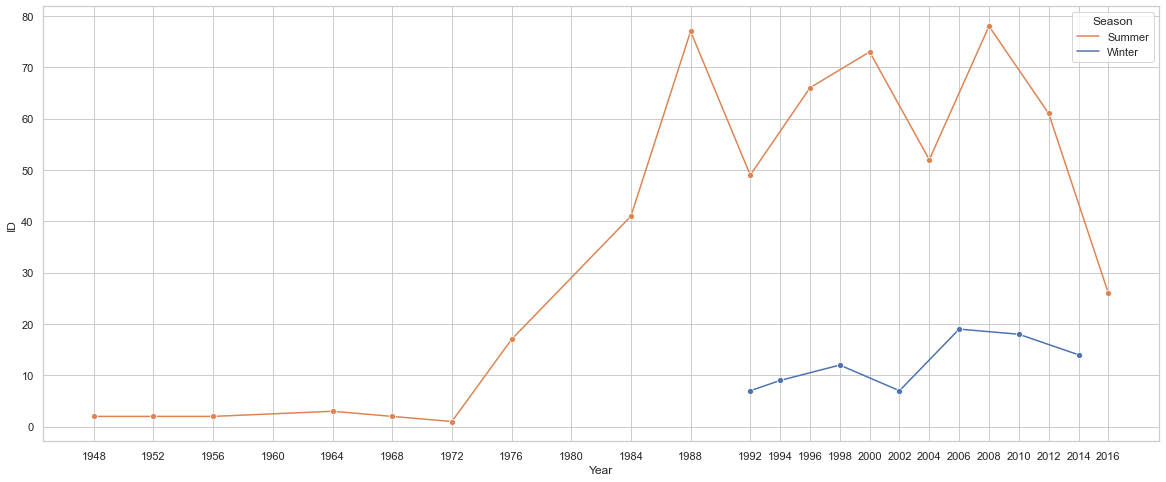

    Year Country       City Summer Winter
42  1992   Spain  Barcelona    XXV      -
['ESP']


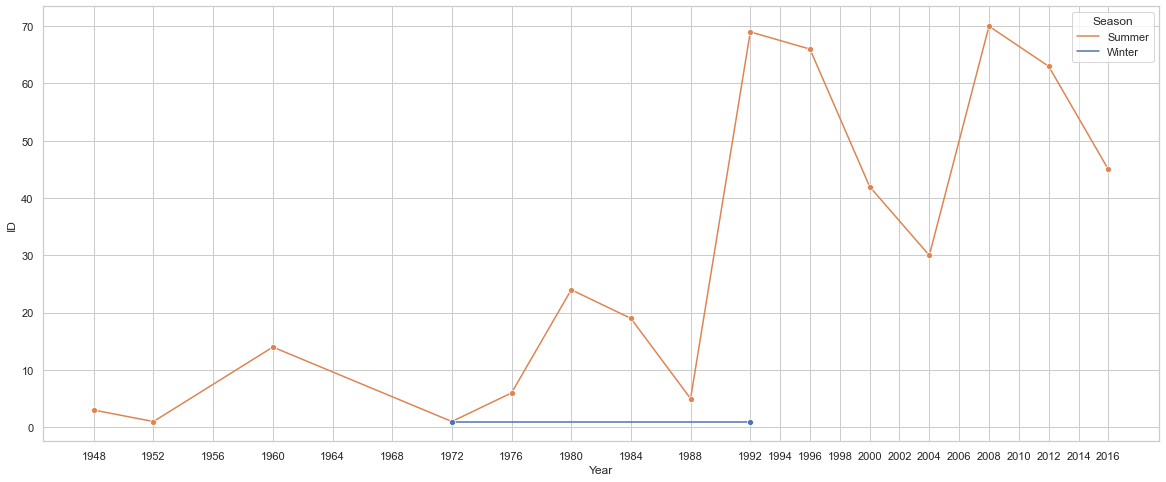

    Year Country    City  Summer Winter
48  2004  Greece  Athens  XXVIII      -
['CRT' 'GRE']


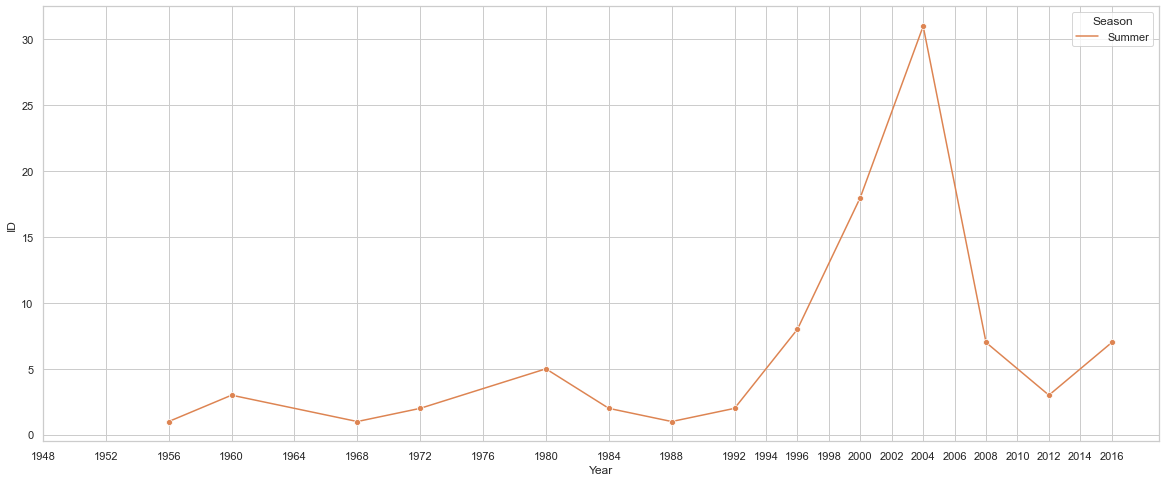

    Year Country     City Summer Winter
50  2008   China  Beijing   XXIX      -
['CHN' 'HKG']


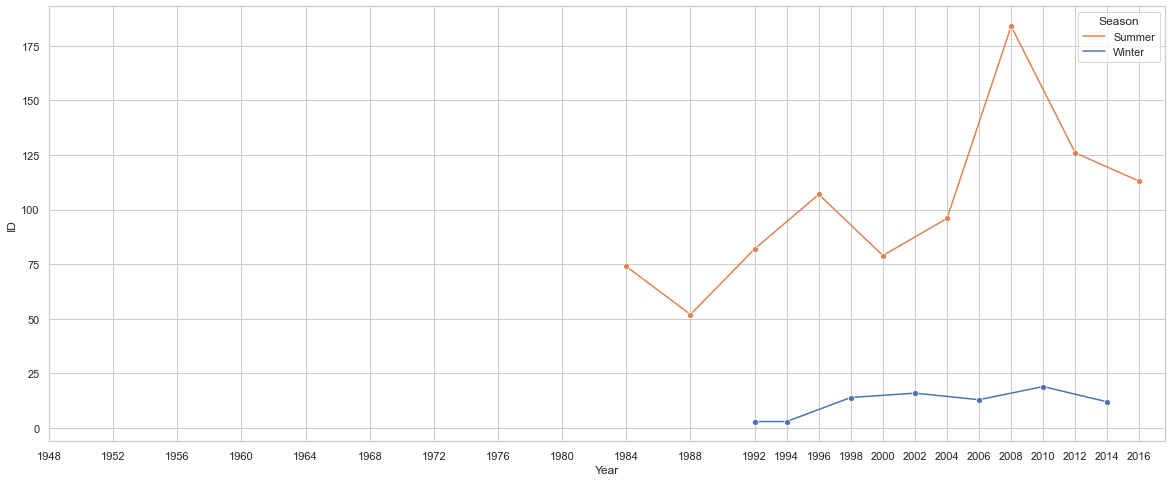

    Year Country   City Summer Winter
53  2014  Russia  Sochi      -   XXII
['EUN' 'RUS']


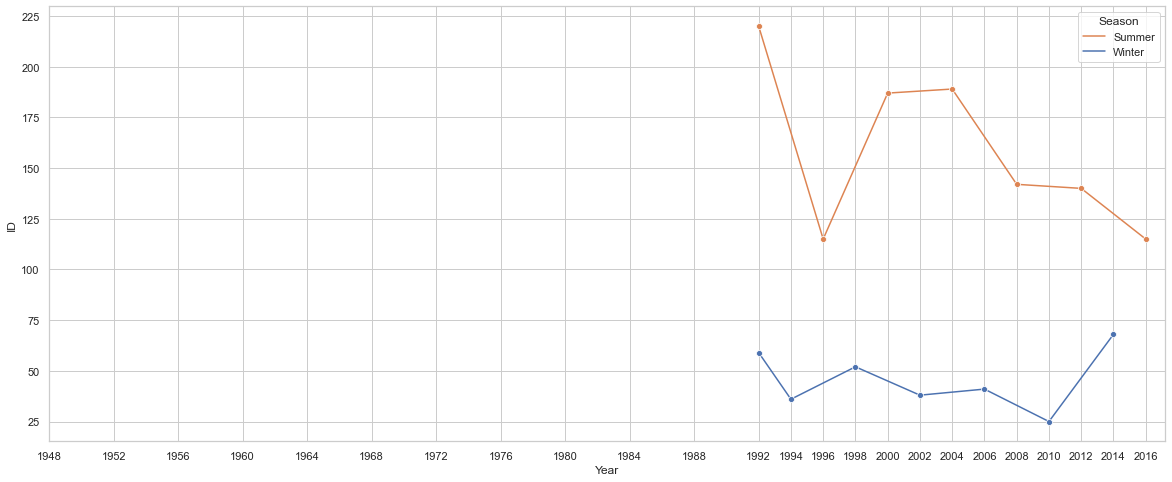

    Year Country            City Summer Winter
54  2016  Brazil  Rio de Janeiro   XXXI      -
['BRA']


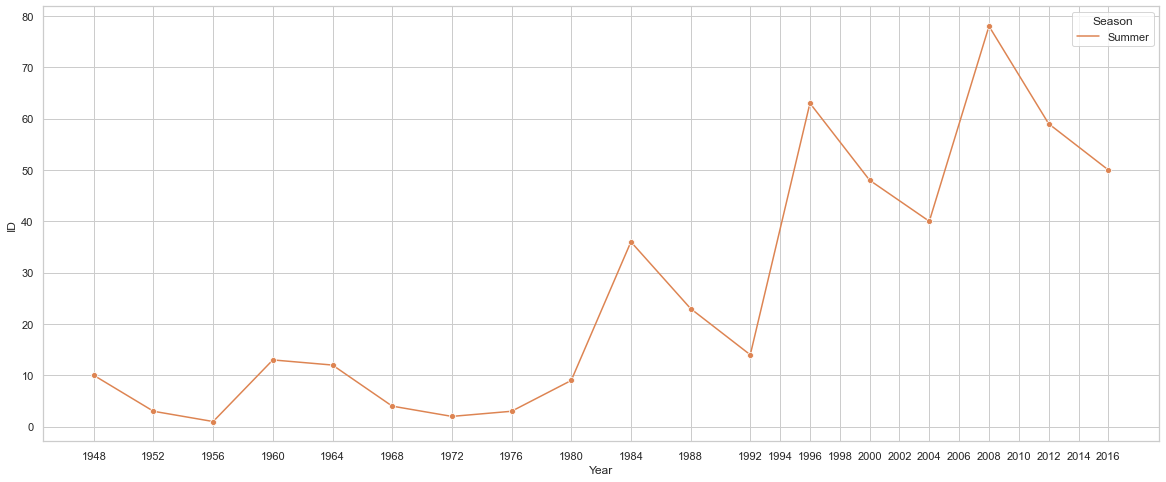

In [31]:
for country in df_hosts['Country'].unique():
    print(df_hosts[df_hosts['Country'] == country][['Year', 'Country', 'City', 'Summer', 'Winter']])
    nocs = df_nocs[df_nocs['region'] == country]['NOC'].unique()
    print(nocs)
    
    df_medals_by_year = df_athletes[df_athletes['NOC'].isin(nocs)].dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()
    
    g = sns.lineplot(data=df_medals_by_year, x="Year", y="ID", hue="Season", marker='o', palette=season_colors)
    g.set_xticks(df_athletes_by_year['Year'].unique())
    plt.show()

In [32]:
nocs_hosts = df_nocs[df_nocs['region'].isin(df_hosts['Country'].unique())]['NOC'].unique()

In [33]:
df_medals_by_year = df_athletes[df_athletes['NOC'].isin(nocs_hosts)].dropna(subset=['Medal']) \
    .groupby(['Year', 'Season', 'NOC']).count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='ID'>

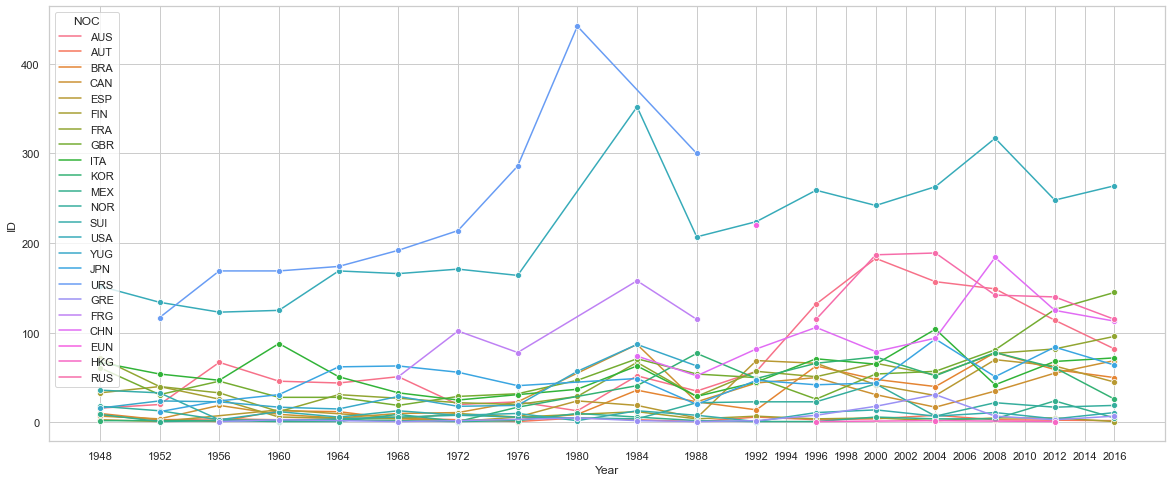

In [34]:
g = sns.lineplot(data=df_medals_by_year[df_medals_by_year['Season'] == 'Summer'], x="Year", y="ID", hue="NOC", marker='o')
g.set_xticks(df_athletes_by_year['Year'].unique())
g

In [35]:
df_hosts

,City,Country,Continent,Summer,Winter,Year,Opening Ceremony,Closing Ceremony
19,St. Moritz,Switzerland,Europe,-,V,1948,January 30,February 8
20,London,United Kingdom,Europe,XIV,-,1948,July 29,August 14
21,Oslo,Norway,Europe,-,VI,1952,February 14,February 25
22,Helsinki,Finland,Europe,XV,-,1952,July 19,August 3
23,Cortina d'Ampezzo,Italy,Europe,-,VII,1956,January 26,February 5
24,Melbourne,Australia,Oceania,XVI,-,1956,November 22,December 8
25,Squaw Valley,United States,North America,-,VIII,1960,February 18,February 28
26,Rome,Italy,Europe,XVII,-,1960,August 25,September 11
27,Innsbruck,Austria,Europe,-,IX,1964,January 29,February 9
28,Tokyo,Japan,Asia,XVIII,-,1964,October 10,October 24


In [72]:
df_athletes['Sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Swimming', 'Badminton', 'Sailing', 'Biathlon',
       'Gymnastics', 'Athletics', 'Art Competitions', 'Alpine Skiing',
       'Handball', 'Weightlifting', 'Wrestling', 'Luge', 'Water Polo',
       'Hockey', 'Rowing', 'Bobsleigh', 'Football', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Fencing', 'Diving',
       'Canoeing', 'Tennis', 'Figure Skating', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Modern Pentathlon',
       'Table Tennis', 'Nordic Combined', 'Baseball',
       'Rhythmic Gymnastics', 'Freestyle Skiing', 'Rugby Sevens',
       'Trampolining', 'Beach Volleyball', 'Triathlon', 'Curling', 'Golf',
       'Snowboarding', 'Ski Jumping', 'Short Track Speed Skating',
       'Skeleton'], dtype=object)

In [79]:
df_athlets_grouped = df_athletes[df_athletes['Sport'] == 'Figure Skating'] \
    .dropna(subset=['Medal']) \
    .sort_values(['Year']) \
    .groupby(['Name', 'Event'])

<AxesSubplot:xlabel='Age', ylabel='Year'>

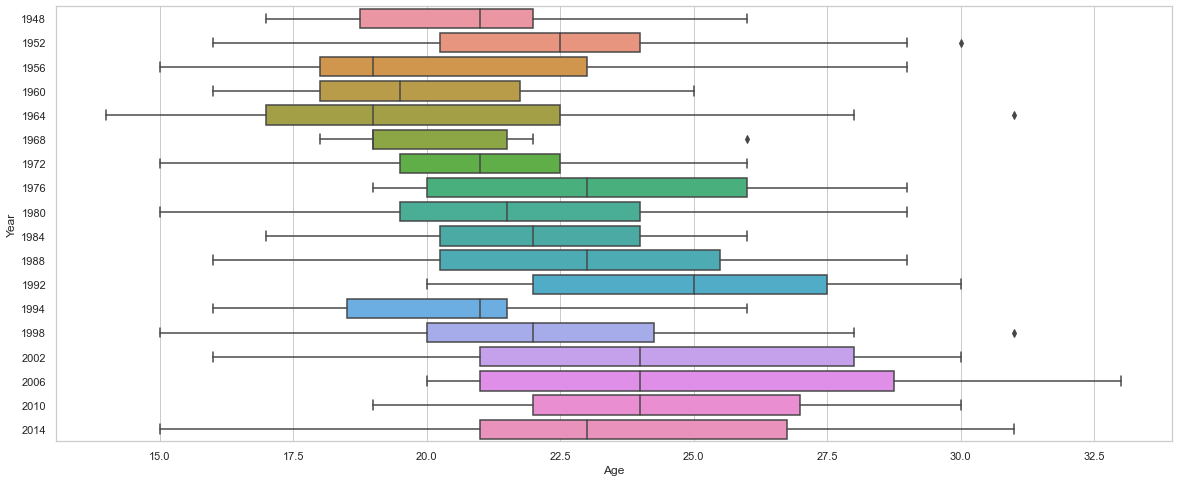

In [80]:
df_athlets_first_award = df_athlets_grouped.first()
sns.boxplot(data=df_athlets_first_award, y='Year', x='Age', orient="h")

<AxesSubplot:xlabel='Age', ylabel='Year'>

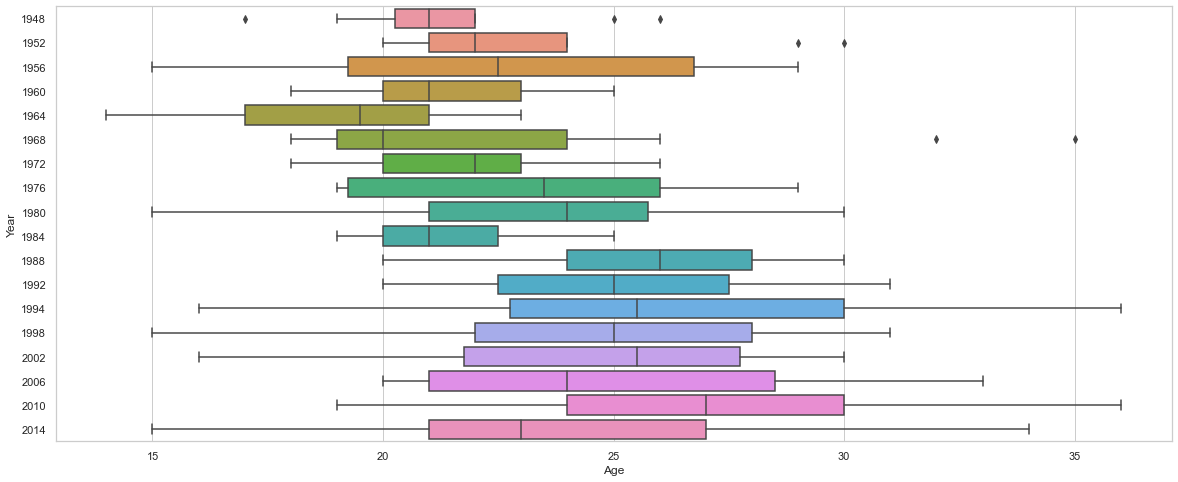

In [81]:
df_athlets_last_award = df_athlets_grouped.last()
sns.boxplot(data=df_athlets_last_award, y='Year', x='Age', orient="h")

In [61]:
df_athlets_first_award.groupby('Year').agg('mean')

,ID,Age,Height,Weight
Year,,,,
1948,66915.171927,28.825588,176.607211,71.951969
1952,68482.416154,25.428126,173.922449,69.722545
1956,69215.722222,24.751853,174.311284,70.255278
1960,66433.036364,24.295572,173.480637,69.310533
1964,68070.063387,24.039986,173.938359,69.720754
1968,67373.597892,23.338750,174.017985,69.227080
1972,67054.189326,23.484072,174.814681,70.054516
1976,67474.243170,22.680857,174.723914,69.492890
1980,67104.219938,22.800071,175.445891,70.310597


In [62]:
df_athlets_last_award.groupby('Year').agg('mean')

,ID,Age,Height,Weight
Year,,,,
1948,66157.537235,29.531698,177.160116,71.596324
1952,68615.747952,26.526924,175.084279,70.092920
1956,69598.997641,26.439040,175.477081,70.695450
1960,66406.345323,25.675314,173.428500,69.368652
1964,68717.514655,25.418736,173.479044,69.457950
1968,65894.233318,24.404534,173.963294,69.224013
1972,67995.273388,24.497182,174.389635,69.611330
1976,67116.853024,23.987551,174.728201,69.629246
1980,67586.951856,23.910989,175.187279,70.112876


In [ ]:
df_medals_by_year = df_athletes.dropna(subset=['Medal']).groupby(['Year', 'Season']).count().reset_index()